# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

## 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [30]:
# IMPORTAÇÃO DE DADOS

df = pd.read_csv('CREDIT_SCORE.csv')
X = df.drop('CREDIT_SCORE', axis=1).astype('float64')
y = df['CREDIT_SCORE'].astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


In [31]:
# VERIFICAÇÃO DE TAMANHOS

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Tamanho do conjunto de treino (y):", y_train.shape)
print("Tamanho do conjunto de teste (y):", y_test.shape)

if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("\nOs tamanhos estão consistentes.")
else:
    print("\nTamanhos inconsistentes!")


Tamanho do conjunto de treino: (119, 7)
Tamanho do conjunto de teste: (40, 7)
Tamanho do conjunto de treino (y): (119,)
Tamanho do conjunto de teste (y): (40,)

Os tamanhos estão consistentes.


In [32]:
# VERIFICAÇÃO DAS VARIÁVEIS 
print("X_train")
print(X_train.head(4))
print("\n--------------------------------------------\n")

print("X_test")
print(X_test.head(4))
print("\n--------------------------------------------\n")

print("y_train")
print(y_train.head(4))
print("\n--------------------------------------------\n")

print("y_test")
print(y_test.head(4))



X_train
      AGE  GENDER   INCOME  EDUCATION  MARITAL_STATUS  NUMBER_OF_CHILDREN  \
109  38.0     1.0  67500.0        2.0             1.0                 2.0   
74   47.0     1.0  95000.0        4.0             1.0                 1.0   
97   36.0     1.0  95000.0        3.0             1.0                 2.0   
27   49.0     1.0  65000.0        4.0             1.0                 1.0   

     HOME_OWNERSHIP  
109             1.0  
74              1.0  
97              1.0  
27              1.0  

--------------------------------------------

X_test
     AGE  GENDER   INCOME  EDUCATION  MARITAL_STATUS  NUMBER_OF_CHILDREN  \
7   37.0     1.0  80000.0        3.0             1.0                 2.0   
40  32.0     0.0  57500.0        1.0             0.0                 0.0   
95  26.0     1.0  50000.0        1.0             0.0                 0.0   
45  28.0     1.0  32500.0        1.0             0.0                 0.0   

    HOME_OWNERSHIP  
7              1.0  
40             0.0 

As variáveis estão corretas.

In [33]:
# VERIFICAÇÃO DE BALANCEAMENTO

print("Distribuição de y_train:")
print(y_train.value_counts())

Distribuição de y_train:
CREDIT_SCORE
2    84
1    25
0    10
Name: count, dtype: int64


Note que não está balanceado.

In [34]:
# BALANCEAMENTO COM SMOTE

smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())

CREDIT_SCORE
2    84
0    84
1    84
Name: count, dtype: int64


# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Primeiro, vale destacar como funciona o método de árvore de decisão, antes de falar propriamente de sua aplicação. O método de árvore de decisão é um método supervisionado que pode ser tanto de classificação, quanto de regressão. Ele funciona da seguinte forma: a partir de uma base de dados, realizamos uma série de perguntas que nos ajudam a classificar determinado objeto a partir de valores probabilísticos. As perguntas estão relacionadas às características do objeto estudado, estas são formadas a partir das categorias do modelo. 

Durante a construção da árvore, o algoritmo utiliza critérios de impureza em cada nó, como Gini ou Entropia, que medem, respectivamente, a impureza e desordem de um nó. O algoritmo de árvore de decisão calcula um desses critérios, selecionado previamente pelo usuário, e a partir dele seleciona aquele com menor valor dessas métricas, o que indica um nó "mais puro", o que se traduz em uma decisão mais acertada. Além disso, também é importante destacar que uma base de dados com mais categorias (o que implica em uma árvore com mais ramos) não necessariamente implica em um algoritmo mais preciso, isso porque algumas categorias têm mais peso do que outras, e o peso maior em categorias mais importantes e menor em menos importantes implica em uma árvore mais eficiente (redução de custo computacional).

Assim como os modelos apresentados anteriormente, selecionamos a categoria de interesse, ou seja, a categoria que estamos interessados em realizar uma previsão e/ou classificação. Em seguida, separamos a base de dados em variáveis de treino e teste. As variáveis de treino, `X_train` e `y_train`, serão responsáveis por realizar o treinamento do modelo, fazendo com que ele "estude" as características para a identificação da categoria de interesse, enquanto as variáveis de teste, `X_test` e `y_test`, são responsáveis por verificar se, a partir do treinamento, o modelo consegue identificar corretamente a variável de interesse para nosso fim.

Feitas as considerações teóricas do modelo, podemos comentar sua aplicação computacional:
1. **Aplicação do algoritmo** Primeiro, aplicamos o algoritmo nas variáveis que separamos para o treino com:
    ```python
    arvore_churn = DecisionTreeClassifier(criterion='gini', random_state=0)
    arvore_churn.fit(X_train, y_train)
    ```

    Após esse procedimento, avaliamos o desempenho do modelo nas variáveis teste:
    ```python
       previsao = arvore_churn_.predict(X_test)
    ```
    
2. **Avaliação do modelo:** Após a construção do modelo, realizamos a avaliação dele utilizando as métricas: precisão, recall e f1-score. Cada uma definida matematicamente abaixo:

    - $\text{Precisão} = \frac{\text{Número total de previsõs corretas}}{\text{Número total de previsõs}}$  

    - $\text{recall} = \frac{\text{Verdadeiros positivos}}{\text{Verdadeiros positivos} + \text{Falsos negativos}}$

    - $F_1 = \frac{2 \times \text{precisão} \times \text{recall}}{\text{precisão} + \text{recall}}$

    Além das métricas apresentadas acima, também utilizamos a matriz de confusão que organiza os resultados em quatro categorias: verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

3. **Melhoria do modelo:** Dada a avaliação do modelo, podemos realizar algumas melhorias caso necessário. A primeira vem da eliminação de parte dos nós, chamada de poda, da árvore. Nesse tipo de melhoria, consideramos o que foi escrito no início, e reduzimos o tamanho da árvore, tornado-a mais eficiente e mais precisa, levando em consideração a relevância de cada categoria. 

Ou, como alternativa ou complemente, podemos alterar alguns parâmetros relacionados à árvore, como: `criterion`, `ccp_alpha` e `class_weight`. 

*Observação:* Apesar da maneira que o texto esteja organizado seja de forma linear, o processo em si não costuma ser. Dado que o processo de melhoria e avaliação pode ser revisitado algumas vezes até que alcance a precisão desejada.


## 4) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [ ]:
# TREINAMENTO DO MODELO DE ÁRVORE DE DECISÃO

arvore_churn = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [36]:
# ACURÁCIA NO CONJUNTO DE TREINO

acuracia = accuracy_score(y_train, arvore_churn.predict(X_train))
print(f"Acurácia no conjunto de treino: ", round(acuracia, 3))

Acurácia no conjunto de treino:  1.0


**Análise:** Temos que a acurácia do modelo atingiu precisão máxima. Apesar de isso aparentemente parecer um bom resultado indica *overfitting*. 

## 5) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [37]:
# RELATÓRIO DE CLASSIFICAÇÃO NO CONJUNTO DE TESTE

previsoes = arvore_churn.predict(X_test)
relatorio = classification_report(y_test, previsoes)
print(relatorio)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.79      1.00      0.88        11
           2       1.00      0.88      0.93        24

    accuracy                           0.93        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.94      0.93      0.93        40



**Análise:** POdemos notar que o modelo consegue identificar muito bem as categorias com destaque para identificar o `CREDIT_SCORE` 0 (Low). Os demais valores de `CREDIT_SCORE` são bem identificáveis também e apresentam algumas taxas menores, porém com mais amostras analisadas, ou seja, o modelo responde bem.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

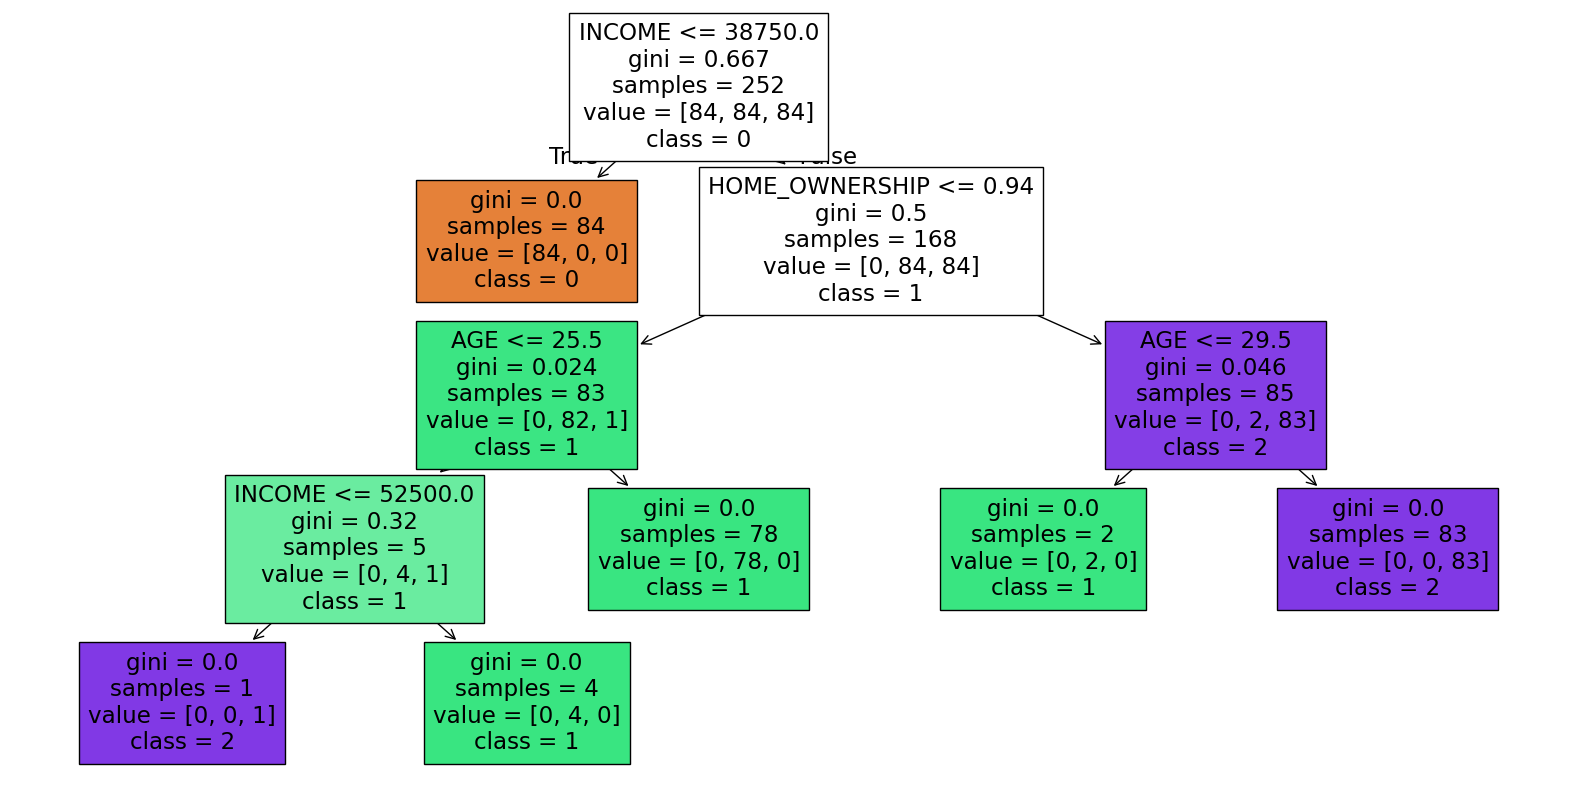

In [38]:
# VISUALIZAÇÃO DA ÁRVORE DE DECISÃO

plt.figure(figsize=(20,10))
plot_tree(arvore_churn, filled=True, feature_names=X_train.columns,class_names=['0', '1', '2'])
plt.show()

Sim. É possível fazer uma avaliação visual (acima). E a profundidade é quatro.

# 6) Identifique as 2 principais features do modelo.


              Feature  Importância
1              GENDER       0.0000
3           EDUCATION       0.0000
5  NUMBER_OF_CHILDREN       0.0000
4      MARITAL_STATUS       0.0000
0                 AGE       0.0255
6      HOME_OWNERSHIP       0.4650
2              INCOME       0.5095


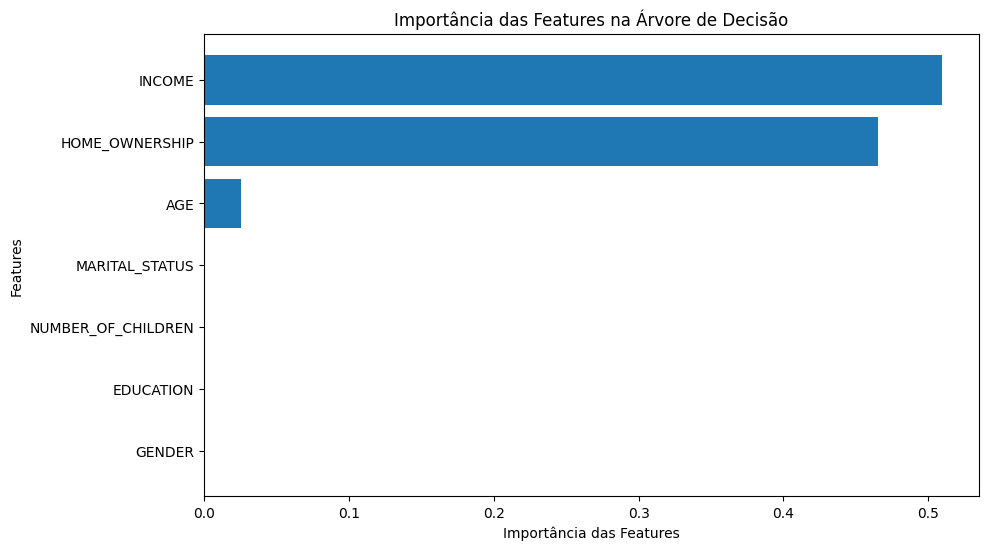

In [39]:
# IDENTIFICAÇÃO DAS FEATURES MAIS IMPORTANTES

importancias_features = arvore_churn.feature_importances_
nomes_features = X_train.columns

importancias_df = pd.DataFrame({
    'Feature': nomes_features,
    'Importância': importancias_features.round(4)
})

importancias_df = importancias_df.sort_values(by='Importância', ascending=True)
print(importancias_df)

plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Feature'], importancias_df['Importância'])
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

A partir do gráfico, podemos observar que as variáveis mais relevantes são `INCOME`(renda) e `HOME_OWNERSHIP` (Se possui uma casa ou não).

## 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [40]:
# TREINAMENTO DO MODELO COM FEATURES REDUZIDAS

X_train_reduzido = X_train[['INCOME', 'HOME_OWNERSHIP']]
X_test_reduzido = X_test[['INCOME', 'HOME_OWNERSHIP']]

arvore_churn_reduzido = DecisionTreeClassifier (criterion = 'gini', random_state = 0)
arvore_churn_reduzido.fit(X_train_reduzido, y_train)
previsoes_reduzido = arvore_churn_reduzido.predict(X_test_reduzido)

acuracia_reduzido = accuracy_score(y_test, previsoes_reduzido)
print(f"Acurácia no conjunto de teste com features reduzidas: ", round(acuracia_reduzido, 3))

Acurácia no conjunto de teste com features reduzidas:  0.925


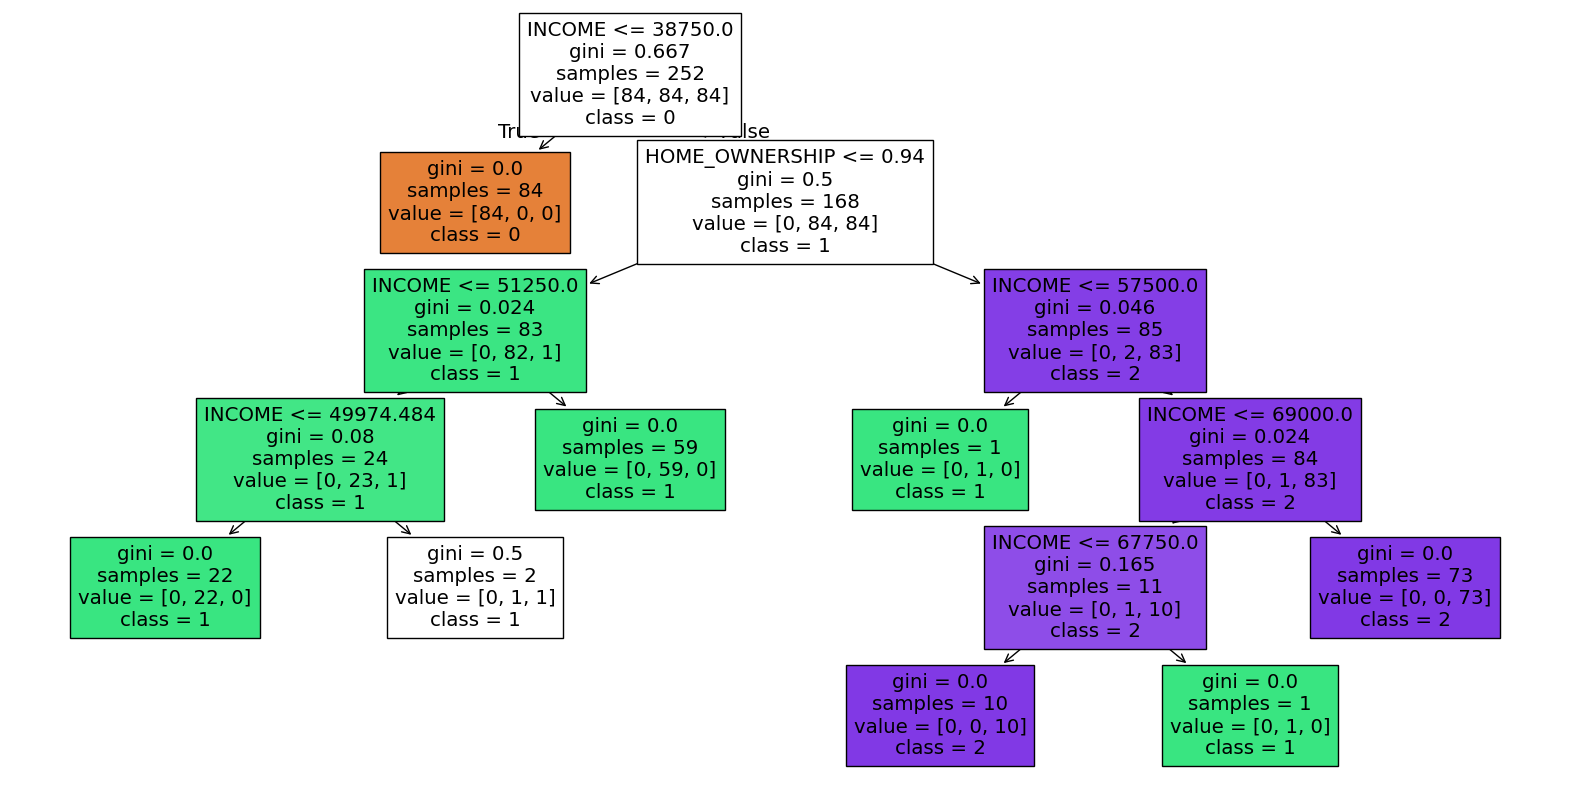

In [41]:
# VISUALIZAÇÃO DA ÁRVORE DE DECISÃO COM FEATURES REDUZIDAS 

plt.figure(figsize=(20,10))
plot_tree(arvore_churn_reduzido, filled=True, feature_names=X_train_reduzido.columns,class_names=['0', '1', '2'])
plt.show()

In [42]:
# RELATÓRIO DE CLASSIFICAÇÃO COM FEATURES REDUZIDAS

relatorio_reduzido = classification_report(y_test, previsoes_reduzido)
print("Relatório de Classificação:")
print(relatorio_reduzido)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.79      1.00      0.88        11
           2       1.00      0.88      0.93        24

    accuracy                           0.93        40
   macro avg       0.93      0.96      0.94        40
weighted avg       0.94      0.93      0.93        40



**Observação:** Para comparação, preferi analisar os valores de precision, recall e f1-score de forma separada para uma comparação mais acertiva. Resultados abaixo.

In [43]:
# COMPARAÇÃO ENTRE MODELOS COMPLETO E REDUZIDO

precision = precision_score(y_test, previsoes, average='weighted')
recall = recall_score(y_test, previsoes, average='weighted')
f1 = f1_score(y_test, previsoes, average='weighted')

precision_reduzido = precision_score(y_test, previsoes_reduzido, average='weighted')
recall_reduzido = recall_score(y_test, previsoes_reduzido, average='weighted')
f1_reduzido = f1_score(y_test, previsoes_reduzido, average='weighted')

print("COMPARAÇÃO ENTRE MODELOS COMPLETO E REDUZIDO:\n")
print("PRECISÃO COMPLETO: ", round(precision, 3), " | REDUZIDO: ", round(precision_reduzido, 3), "| DIFERENÇA: ", round(precision - precision_reduzido, 3))
print("RECALL COMPLETO: ", round(recall, 3), " | REDUZIDO: ", round(recall_reduzido, 3), "| DIFERENÇA: ", round(recall - recall_reduzido, 3))
print("F1 COMPLETO: ", round(f1, 3), " | REDUZIDO: ", round(f1_reduzido, 3), "| DIFERENÇA: ", round(f1 - f1_reduzido, 3))

COMPARAÇÃO ENTRE MODELOS COMPLETO E REDUZIDO:

PRECISÃO COMPLETO:  0.941  | REDUZIDO:  0.941 | DIFERENÇA:  0.0
RECALL COMPLETO:  0.925  | REDUZIDO:  0.925 | DIFERENÇA:  0.0
F1 COMPLETO:  0.927  | REDUZIDO:  0.927 | DIFERENÇA:  0.0


A partir da comparação acima, temos que a diferença é nula. Contudo, é importante salientar que obtivemos os mesmos resultados com menos features, ou seja, otimizamos computacionalmente nosso modelo. 

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Primeiro, vamos reproduzir rapidamento o modelo de Naive Bayes de forma que a tarefa fique autocontida em um único arquivo `.ipynb`.

In [44]:
# MODELO DE NAIVE BAYES PARA COMPARAÇÃO

naive_churn = GaussianNB()
naive_churn.fit(X_train, y_train.values.ravel())

y_pred_train = naive_churn.predict(X_train)
y_pred_test = naive_churn.predict(X_test)

acuracia_nb_test = accuracy_score(y_test, y_pred_test)
recall_nb_test = recall_score(y_test, y_pred_test, average='macro')
precision_nb_test = precision_score(y_test, y_pred_test, average='weighted')
f1_nb_test = f1_score(y_test, y_pred_test, average='weighted')

In [45]:
# COMPARAÇÃO COM MODELO NAIVE BAYES x ARVORE DE DECISÃO (REDUZIDO)

print("COMPARAÇÃO COM MODELO PARA AS VARIÁVEIS DE TESTE: ÁRVORE DE DECISÃO (REDUZIDO) x NAIVE BAYES\n")
print("Acurácia:", round(acuracia_reduzido - acuracia_nb_test, 3))
print("Recall:", round(recall_reduzido - recall_nb_test, 3))
print("Precisão:", round(precision_reduzido - precision_nb_test, 3))
print("F1-Score:", round(f1_reduzido - f1_nb_test, 3))

COMPARAÇÃO COM MODELO PARA AS VARIÁVEIS DE TESTE: ÁRVORE DE DECISÃO (REDUZIDO) x NAIVE BAYES

Acurácia: -0.075
Recall: -0.075
Precisão: -0.059
F1-Score: -0.073


Observe que em todas as avaliações, o modelo de Naive Bayes, obteve melhores métricas ao ser comparado com o modelo de árvore de decisão. Concluímos que o modelo de Naive Bayes é mais adequado para o nosso propósito.